# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [8]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sci
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import geom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import binom

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [126]:
# Your code here
samples = [10, 50, 500, 5000]
mean = 50
sigma = 5
a = np.random.normal(mean, sigma, 10)
b = np.random.normal(mean, sigma, 50)
c = np.random.normal(mean, sigma, 500)
d = np.random.normal(mean, sigma, 5000)

print('A = ', stats.normaltest(a))
print('B = ', stats.normaltest(b))
print('C = ', stats.normaltest(c))
print('D = ', stats.normaltest(d))

A =  NormaltestResult(statistic=1.0833627568667243, pvalue=0.5817692552932956)
B =  NormaltestResult(statistic=3.930135528337035, pvalue=0.1401463893904855)
C =  NormaltestResult(statistic=3.37694113514544, pvalue=0.18480195005718747)
D =  NormaltestResult(statistic=1.109522730420255, pvalue=0.5742092711568796)


#### Interpret the normaltest results and make your observations.

In [130]:
# Explain the test results here
x = [a, b, c, d]
alpha = 0.05 #nivel de confianza de 0,95
for n in x: 
    stats.normaltest(n)
    for pvalue in stats.normaltest(n):
        if pvalue < alpha:
            print ("La hipótesis la rechazamos")
        else:
            print ("La hipótesis es aceptada")

La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada
La hipótesis es aceptada


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

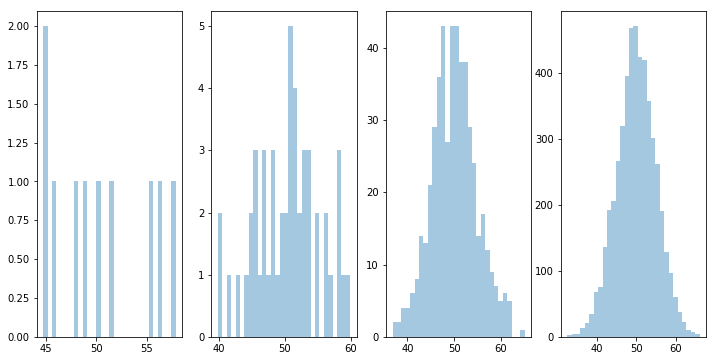

In [64]:
fig, axes = plt.subplots(1,4, figsize=(12,6))
sns.distplot(a, bins=30, kde=False,ax=axes[0])
sns.distplot(b, bins=30, kde=False,ax=axes[1])
sns.distplot(c, bins=30, kde=False,ax=axes[2])
sns.distplot(d, bins=30, kde=False,ax=axes[3])

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

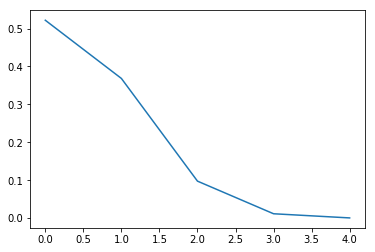

In [101]:
# Your code here
n = 4
k = np.arange(0,n+1)
p = 0.15
binomial = binom.pmf(k, n, p)
plt.plot(k, binomial)

#### Explain what you observe from the plot above

La probabilidad de que 0 personas hagan click es 50% aproximadamente. Y la probabilidad de que las 4 personas hagan click es de 0%. 

#### Now plot PMP with 50, 500, and 5000 visitors.

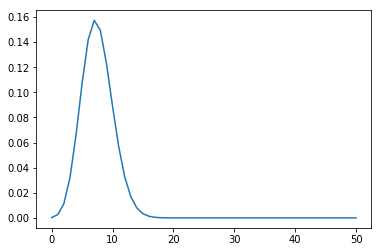

In [102]:
n = 50
k = np.arange(0,n+1)
p = 0.15
binomial = binom.pmf(k, n, p)
plt.plot(k, binomial)

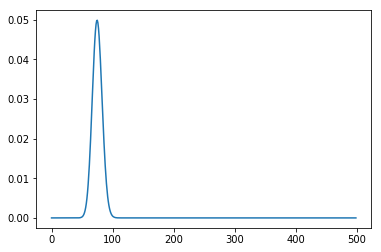

In [77]:
n = 500
k = np.arange(0,n+1)
p = 0.15
binomial = binom.pmf(k, n, p)
plt.plot(k, binomial)

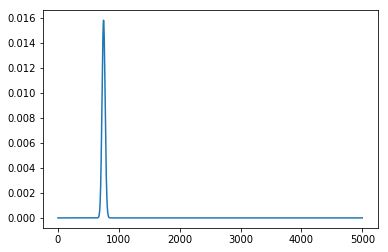

In [78]:
n = 5000
k = np.arange(0,n+1)
p = 0.15
binomial = binom.pmf(k, n, p)
plt.plot(k, binomial)

#### What did you notice from the distribution plots? Comment your findings.

Muestra una distibución sesgada a la derecha. 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

La probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [173]:
# Your comment here
mu = 300
size_p = 1000
r = stats.poisson.rvs(mu, size=size_p)
print((len(r[r==320])/size_p)*100)

1.4000000000000001


#### What is the probability of getting 60 visits?

In [4]:
mu = 300
size_p = 1000
r = stats.poisson.rvs(mu, size=size_p)
print((len(r[r==60])/size_p)*100)

0.0


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

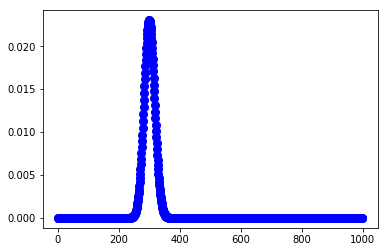

In [9]:
fig, ax = plt.subplots(1, 1)
mu=300
x = np.arange(0,1000)
ax.plot(x, sci.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')